## PERC Rule for Pulmonary Embolism

### Seven Criteria of PERC Rule



1. Age < 50 years
2. Heart rate < 100 bpm
3. Oxygen saturation ≥ 95% 
4. No hemoptysis
5. No estrogen use
6. No prior venous thromboembolism (VTE)
7. No unilateral leg swelling

### Quick Overview

In [8]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from src.perc_utils import *

dataset = load_dataset("ncbi/MedCalc-Bench-v1.0")
df = dataset["train"].to_pandas()  # or "test"
df_test = dataset["test"].to_pandas()  # or "test"

perc_df = df[df["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

perc_df_test = df_test[df_test["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

# Load dataset
dataset = load_dataset("ncbi/MedCalc-Bench-v1.0")
df = dataset["train"].to_pandas()  # or "test"
df_test = dataset["test"].to_pandas()  # or "test"
# Filter for calculator name "PERC"

perc_df = df[df["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

perc_df_test = df_test[df_test["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]


/Users/malthehli/Documents/ai_paper_tool/src/perc_utils.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # perc_df["Parsed Entities"] = perc_df["Relevant Entities"].apply(safe_parse)


#### Simple prompt (includes all relevant entites in prompt)


=== Evaluating model: Llama-3.3-70B-Instruct ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Evaluating model: Llama3-Med42-70B ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)

Task exception was never retrieved
future: <Task finished name='Task-31' coro=<get_chat_completion() done, defined at /Users/malthehli/Documents/ai_paper_tool/src/perc_utils.py:295> exception=RuntimeError('Session is closed')>
Traceback (most recent call last):
  File "/Users/malthehli/Documents/ai_paper_tool/src/perc_utils.py", line 308, in get_chat_completion
    async with sem:
  File "/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/aiohttp/client.py", line 1482, in __aenter__
    self._resp: _RetType = await self._coro
  File "/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/aiohttp/client.py", line 527, in _request
    raise RuntimeError("Session is closed")
RuntimeError: Session is closed
Task exception was never retrieved
future: <Task finished name='Task-32' coro=<get_chat_completion() done, defined at /Users/malthehli/Documents/ai_paper_tool/src/perc_utils.py:295> exception=RuntimeError('Session is closed')>
Traceback (most 


Done ✅

=== Evaluating model: Med42-Qwen2.5-72B-v3-bi ===



Task exception was never retrieved
future: <Task finished name='Task-64' coro=<get_chat_completion() done, defined at /Users/malthehli/Documents/ai_paper_tool/src/perc_utils.py:295> exception=RuntimeError('Session is closed')>
Traceback (most recent call last):
  File "/Users/malthehli/Documents/ai_paper_tool/src/perc_utils.py", line 308, in get_chat_completion
    async with sem:
  File "/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/aiohttp/client.py", line 1482, in __aenter__
    self._resp: _RetType = await self._coro
  File "/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/aiohttp/client.py", line 527, in _request
    raise RuntimeError("Session is closed")
RuntimeError: Session is closed
Task exception was never retrieved
future: <Task finished name='Task-121' coro=<get_chat_completion() done, defined at /Users/malthehli/Documents/ai_paper_tool/src/perc_utils.py:295> exception=RuntimeError('Session is closed')>
Traceback (most

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Summary Table ===
                  model_id  wrong  correct  invalid  total  accuracy
0   Llama-3.3-70B-Instruct    133        0        0    133       0.0
1         Llama3-Med42-70B    125        0        8    133       0.0
2  Med42-Qwen2.5-72B-v3-bi    133        0        0    133       0.0


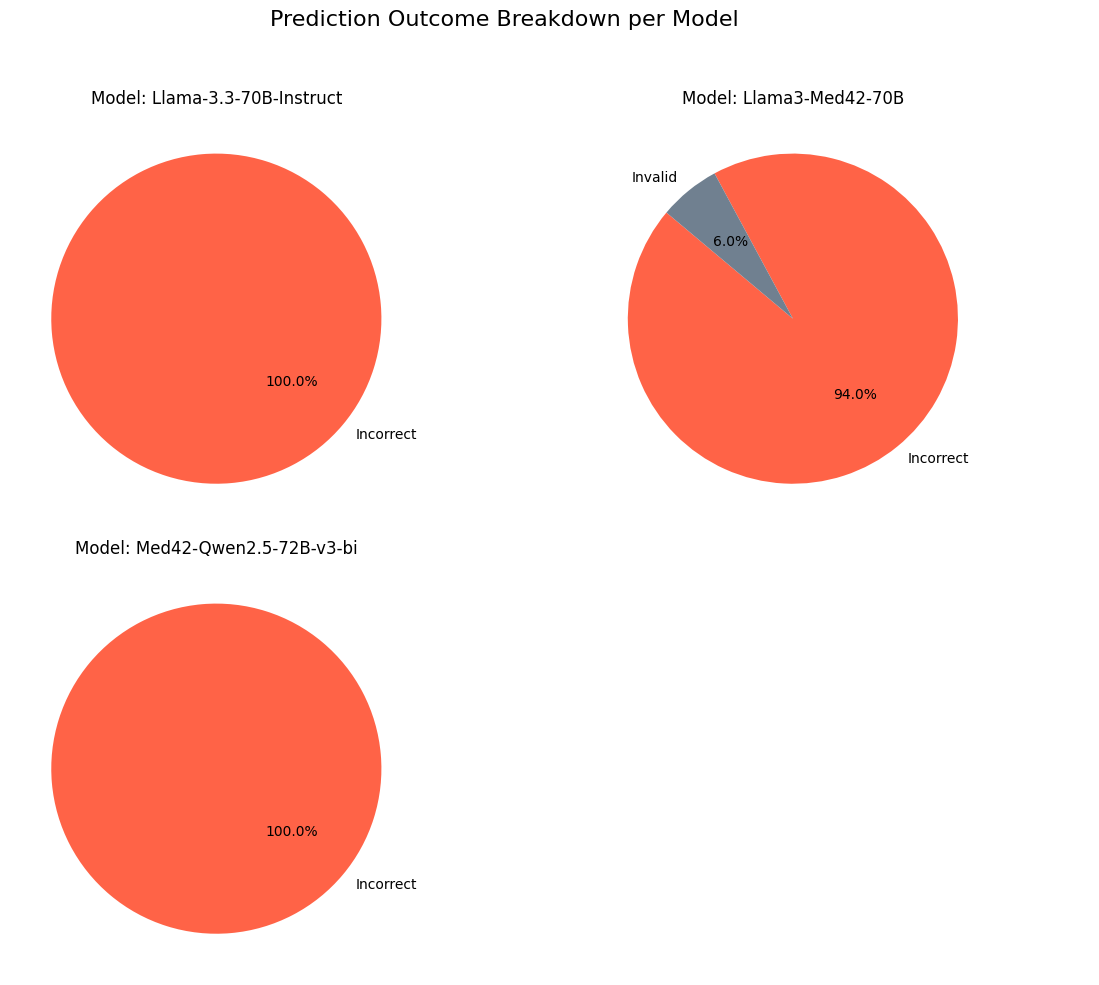

In [11]:
invalid_outputs, wrong_outputs, results_df,parsed_json = await run_models_with_output(
    sys_instruct=(
        "You are a helpful Medical Assistant. After you calculate the PERC score, provide an explanation of how "
        "you arrived at that score along with the score in JSON format. \n"
        "The JSON should be in the format: {\"Explanation\": \"<explanation>\", \"Answer\": <score>}"
    ),
    model_ids=model_ids,
    include_relevant_entities=True,
    full_df=True
)
plot_df_pie(results_df)


#### Simple prompt (does not include relevant entites in prompt)


=== Evaluating model: Llama-3.3-70B-Instruct ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Evaluating model: Llama3-Med42-70B ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Evaluating model: Med42-Qwen2.5-72B-v3-bi ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Summary Table ===
                  model_id  wrong  correct  invalid  total  accuracy
0   Llama-3.3-70B-Instruct    115       18        0    133     0.135
1         Llama3-Med42-70B    108       25        0    133     0.188
2  Med42-Qwen2.5-72B-v3-bi    107       26        0    133     0.195


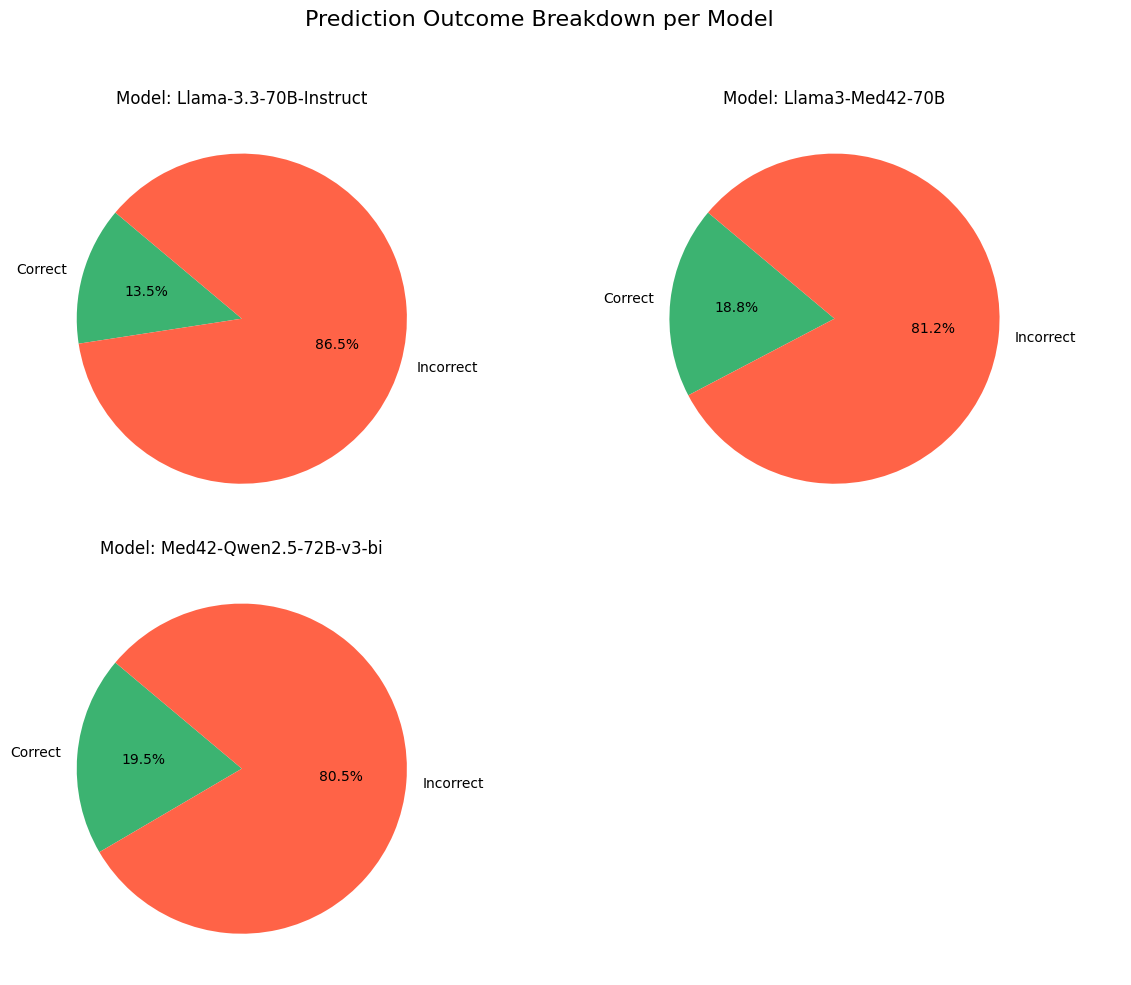

In [ ]:
invalid_outputs, wrong_outputs, results_df,parsed_json = await run_models_with_output(
    sys_instruct=(
        "You are a helpful Medical Assistant. After you calculate the PERC score, provide an explanation of how "
        "you arrived at that score along with the score in JSON format. \n"
        "The JSON should be in the format: {\"Explanation\": \"<explanation>\", \"Answer\": <score>}"
    ),
    model_ids=model_ids,
    include_relevant_entities=False,
    full_df=True
)
plot_df_pie(results_df)


#### Troubleshooting wrong/invalid replies

In [ ]:
def print_outputs(wrong_outputs,invalid_outputs):
    for i, entry in enumerate(wrong_outputs):
        print(f"\n--- Wrong Reply {i+1} ---")
        print(f"Expected: {entry['expected']} | Predicted: {entry['predicted']}")
        print(f"Reply:\n{entry['reply']}")

    # Extract invalid replies with metadata
    for i, entry in enumerate(invalid_outputs):
        print(f"\n--- Invalid Reply {i+1} ---")
        print(f"Expected: {entry['expected']} | Predicted: {entry['predicted']}")
        print(f"Reply:\n{entry['reply']}")

# invalid_replies = [entry['reply'] for entry in invalid_outputs if 'reply' in entry]
# for i, reply in enumerate(invalid_replies):
#     print(f"\n--- Invalid Reply {i+1} ---\n{reply}")


#### More detailed system instruction (includes relevant entities in prompt)


=== Evaluating model: Llama-3.3-70B-Instruct ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Evaluating model: Llama3-Med42-70B ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Evaluating model: Med42-Qwen2.5-72B-v3-bi ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Summary Table ===
                  model_id  wrong  correct  invalid  total  accuracy
0   Llama-3.3-70B-Instruct    103       30        0    133     0.226
1         Llama3-Med42-70B     95       38        0    133     0.286
2  Med42-Qwen2.5-72B-v3-bi     99       34        0    133     0.256


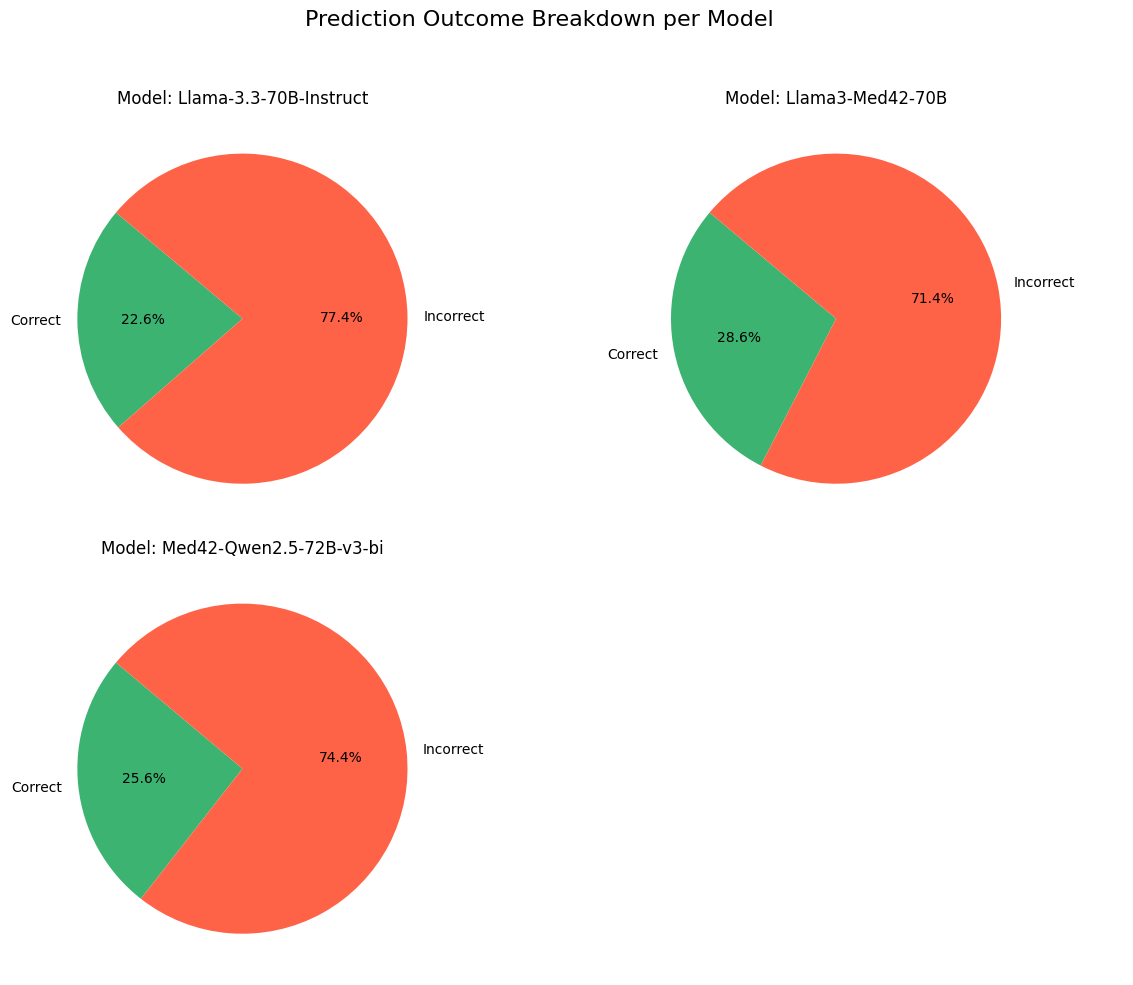

In [ ]:
sys_instruct = (
    "You are a clinical decision support assistant.\n"
    "\n"
    "Your task is to calculate the PERC (Pulmonary Embolism Rule-out Criteria) score for a patient using the note and extracted entities provided.\n"
    "\n"
    "There are 7 criteria. Each one is evaluated as either true (criterion met) or false (criterion not met). Each false criterion adds 1 point to the PERC score.\n"
    "\n"
    "PERC Criteria:\n"
    "1. Age < 50 years\n"
    "2. Heart rate < 100 bpm\n"
    "3. Oxygen saturation ≥ 95%\n"
    "4. No hemoptysis\n"
    "5. No estrogen use\n"
    "6. No prior venous thromboembolism (VTE)\n"
    "7. No unilateral leg swelling\n"
    "\n"
    "After your output return a **single JSON object*.\n"
    "\n"
    "Format:\n"
    "{\n"
    "  \"Explanation\": \"<A short explanation of how each criterion was evaluated>\",\n"
    "  \"Criteria\": {\n"
    "    \"Age < 50\": true or false,\n"
    "    \"HR < 100\": true or false,\n"
    "    \"O₂ ≥ 95%\": true or false,\n"
    "    \"No hemoptysis\": true or false,\n"
    "    \"No estrogen use\": true or false,\n"
    "    \"No prior VTE\": true or false,\n"
    "    \"No unilateral leg swelling\": true or false\n"
    "  },\n"
    "  \"Answer\": <sum of false values>\n"
    "}\n"
    "\n"

)
invalid_outputs, wrong_outputs, results_df,parsed_json = await run_models_with_output(
    sys_instruct = sys_instruct
    ,prompt="Calculate the PERC score for this patient based on the 7 criteria above. Explain how each criterion applies, then return the result in the specified JSON format.",
    model_ids=model_ids,
    include_relevant_entities=True,
    full_df=True
)
plot_df_pie(results_df)


#### More detailed system instruction (does not include relevant entities in prompt)


=== Evaluating model: Llama-3.3-70B-Instruct ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Evaluating model: Llama3-Med42-70B ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Evaluating model: Med42-Qwen2.5-72B-v3-bi ===

Batch Progress: 100.0% (133/133)
Parsing: 100.0% (133/133)
Done ✅

=== Summary Table ===
                  model_id  wrong  correct  invalid  total  accuracy
0   Llama-3.3-70B-Instruct    103       30        0    133     0.226
1         Llama3-Med42-70B     95       38        0    133     0.286
2  Med42-Qwen2.5-72B-v3-bi    106       27        0    133     0.203


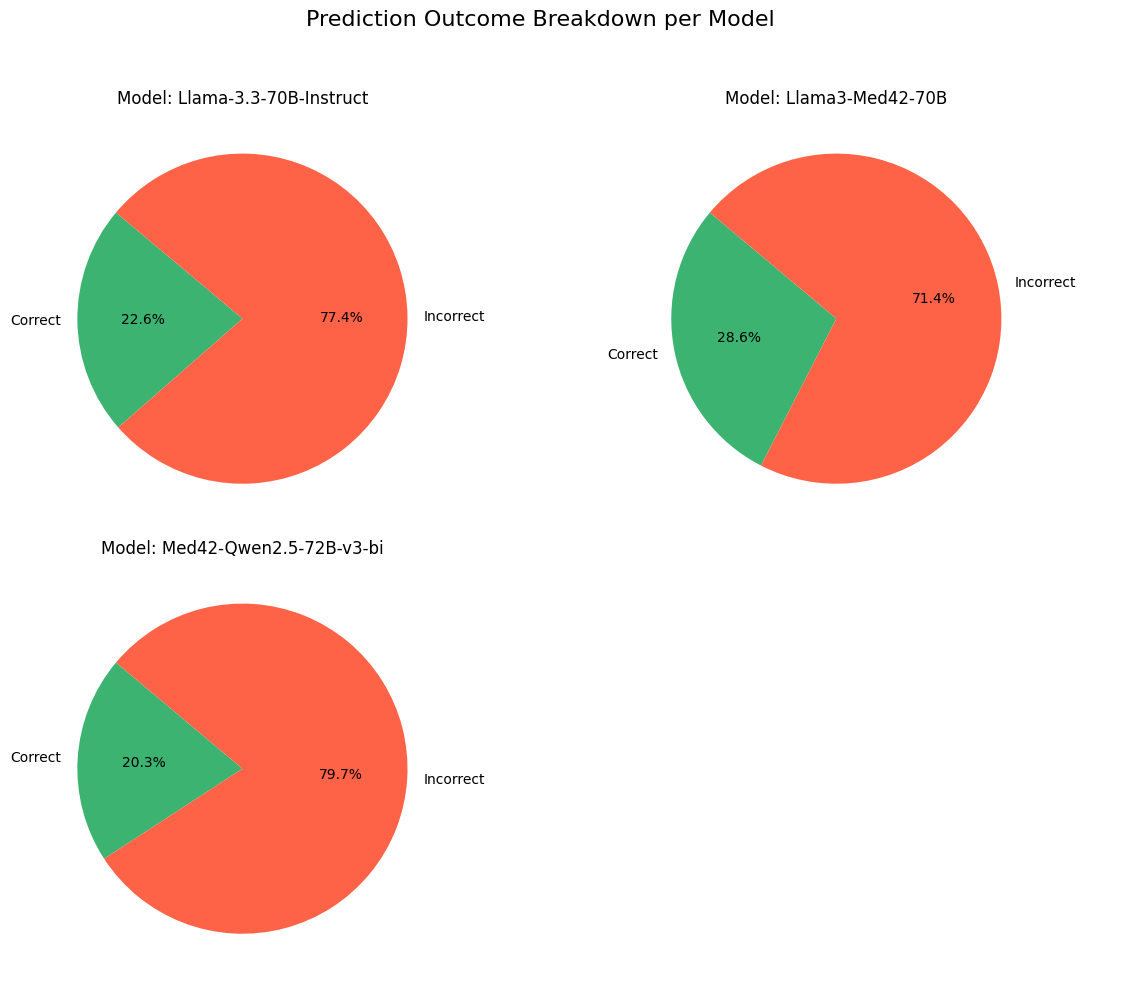

In [ ]:
sys_instruct = (
    "You are a clinical decision support assistant.\n"
    "\n"
    "Your task is to calculate the PERC (Pulmonary Embolism Rule-out Criteria) score for a patient using the note and extracted entities provided.\n"
    "\n"
    "There are 7 criteria. Each one is evaluated as either true (criterion met) or false (criterion not met). Each false criterion adds 1 point to the PERC score.\n"
    "\n"
    "PERC Criteria:\n"
    "1. Age < 50 years\n"
    "2. Heart rate < 100 bpm\n"
    "3. Oxygen saturation ≥ 95%\n"
    "4. No hemoptysis\n"
    "5. No estrogen use\n"
    "6. No prior venous thromboembolism (VTE)\n"
    "7. No unilateral leg swelling\n"
    "\n"
    "After your output return a **single JSON object*.\n"
    "\n"
    "Format:\n"
    "{\n"
    "  \"Explanation\": \"<A short explanation of how each criterion was evaluated>\",\n"
    "  \"Criteria\": {\n"
    "    \"Age < 50\": true or false,\n"
    "    \"HR < 100\": true or false,\n"
    "    \"O₂ ≥ 95%\": true or false,\n"
    "    \"No hemoptysis\": true or false,\n"
    "    \"No estrogen use\": true or false,\n"
    "    \"No prior VTE\": true or false,\n"
    "    \"No unilateral leg swelling\": true or false\n"
    "  },\n"
    "  \"Answer\": <sum of false values>\n"
    "}\n"
    "\n"

)
invalid_outputs, wrong_outputs, results_df,parsed_json = await run_models_with_output(
    sys_instruct = sys_instruct
    ,prompt="Calculate the PERC score for this patient based on the 7 criteria above. Explain how each criterion applies, then return the result in the specified JSON format.",
    model_ids=model_ids,
    include_relevant_entities=False,
    full_df=True
)
plot_df_pie(results_df)


### Accuracy (Used the data from "More detailed system instruction (does not include relevant entities in prompt)")

#### Outputs and Ground truth answer

In [ ]:
accuracy_table = compute_truth_table(parsed_json, perc_df)
print(accuracy_table)


Model                       Llama-3.3-70B-Instruct  Llama3-Med42-70B  \
Criterion                                                              
Age < 50                                     0.534             0.563   
HR < 100                                     0.556             0.563   
No estrogen use                              0.947             0.849   
No hemoptysis                                0.880             0.889   
No prior VTE                                 0.955             0.810   
No unilateral leg swelling                   0.917             0.810   
O₂ ≥ 95%                                     0.541             0.595   

Model                       Med42-Qwen2.5-72B-v3-bi  
Criterion                                            
Age < 50                                      0.481  
HR < 100                                      0.426  
No estrogen use                               0.891  
No hemoptysis                                 0.868  
No prior VTE               

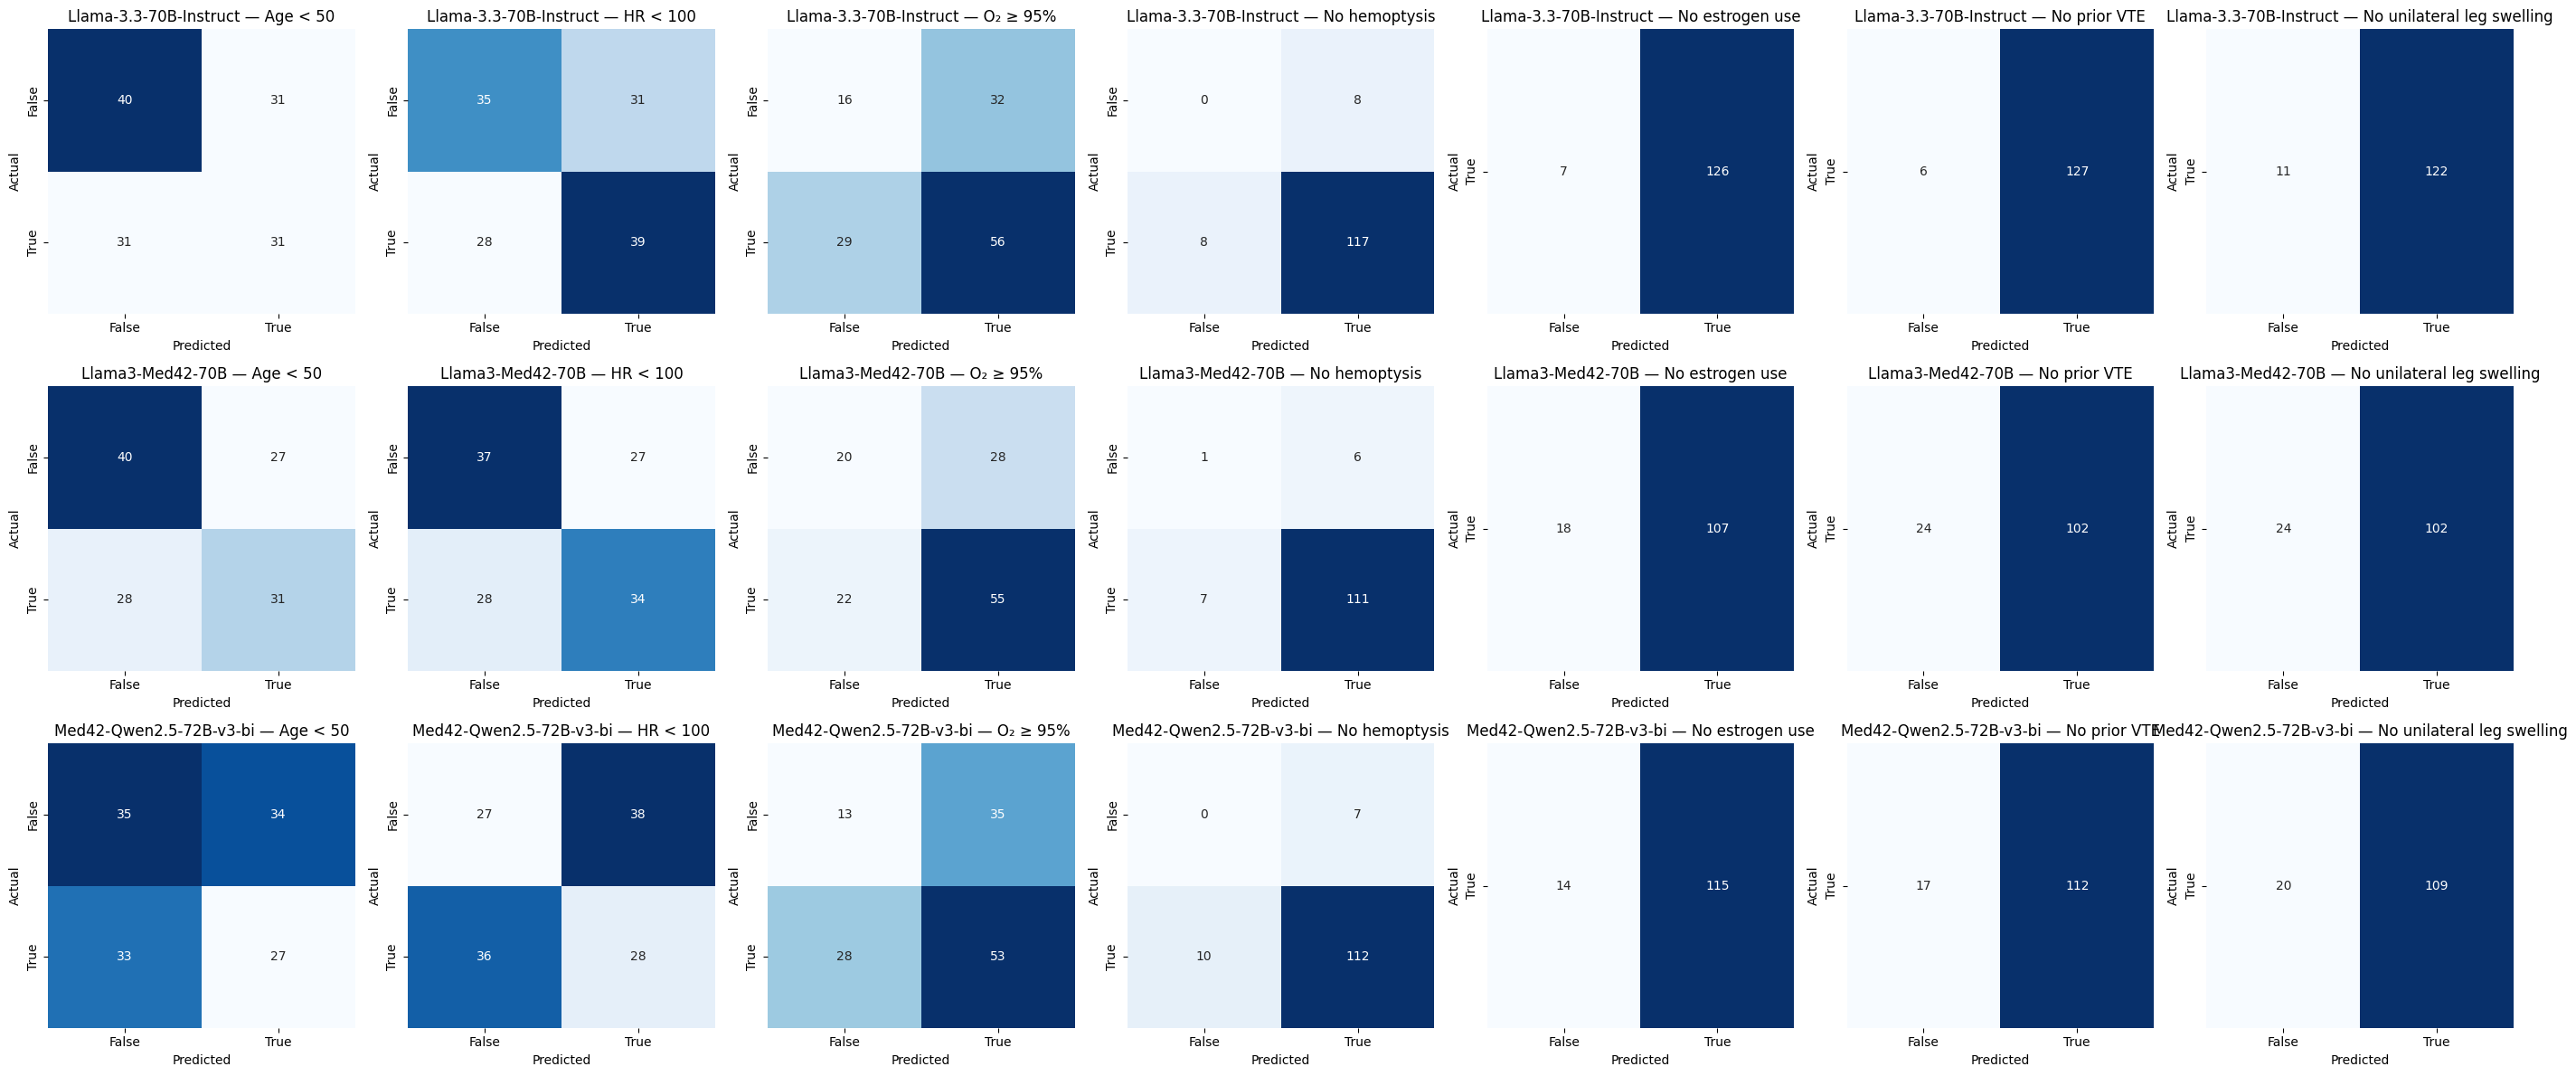

In [ ]:
plot_confusion_matrices_by_model(parsed_json, perc_df)

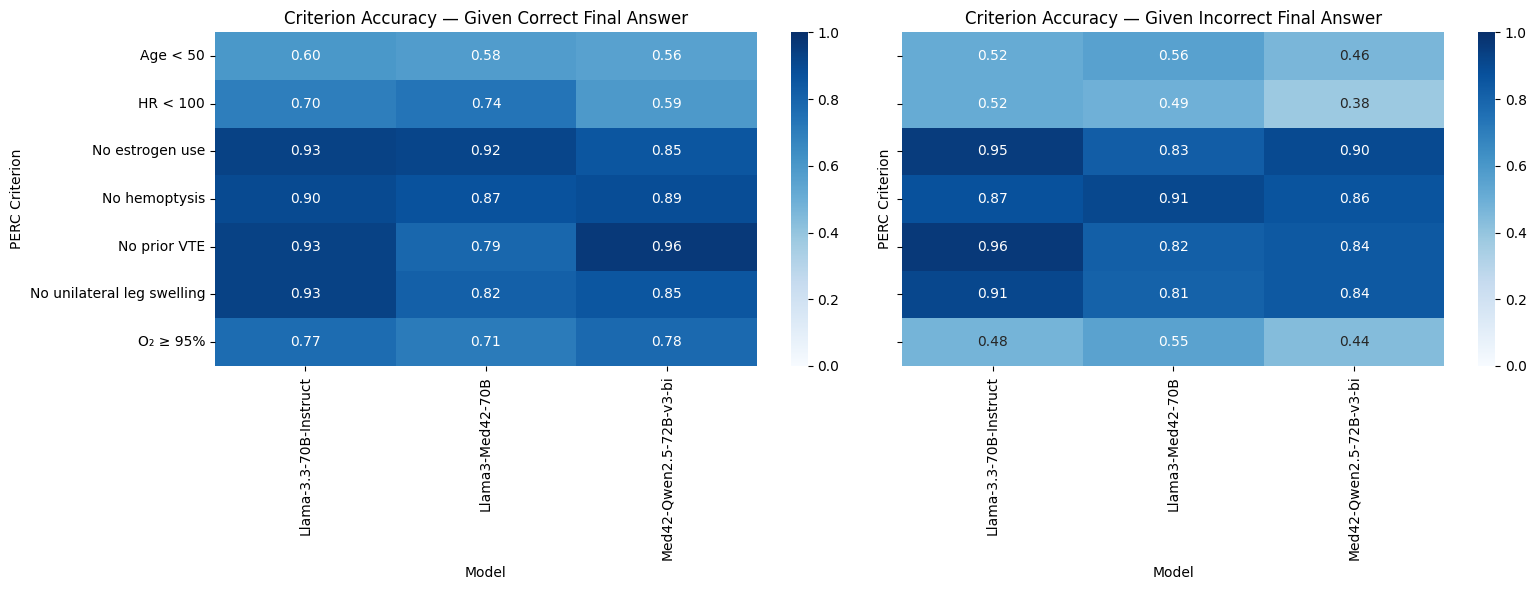

In [ ]:
plot_criteria_accuracy_by_outcome(parsed_json, perc_df)


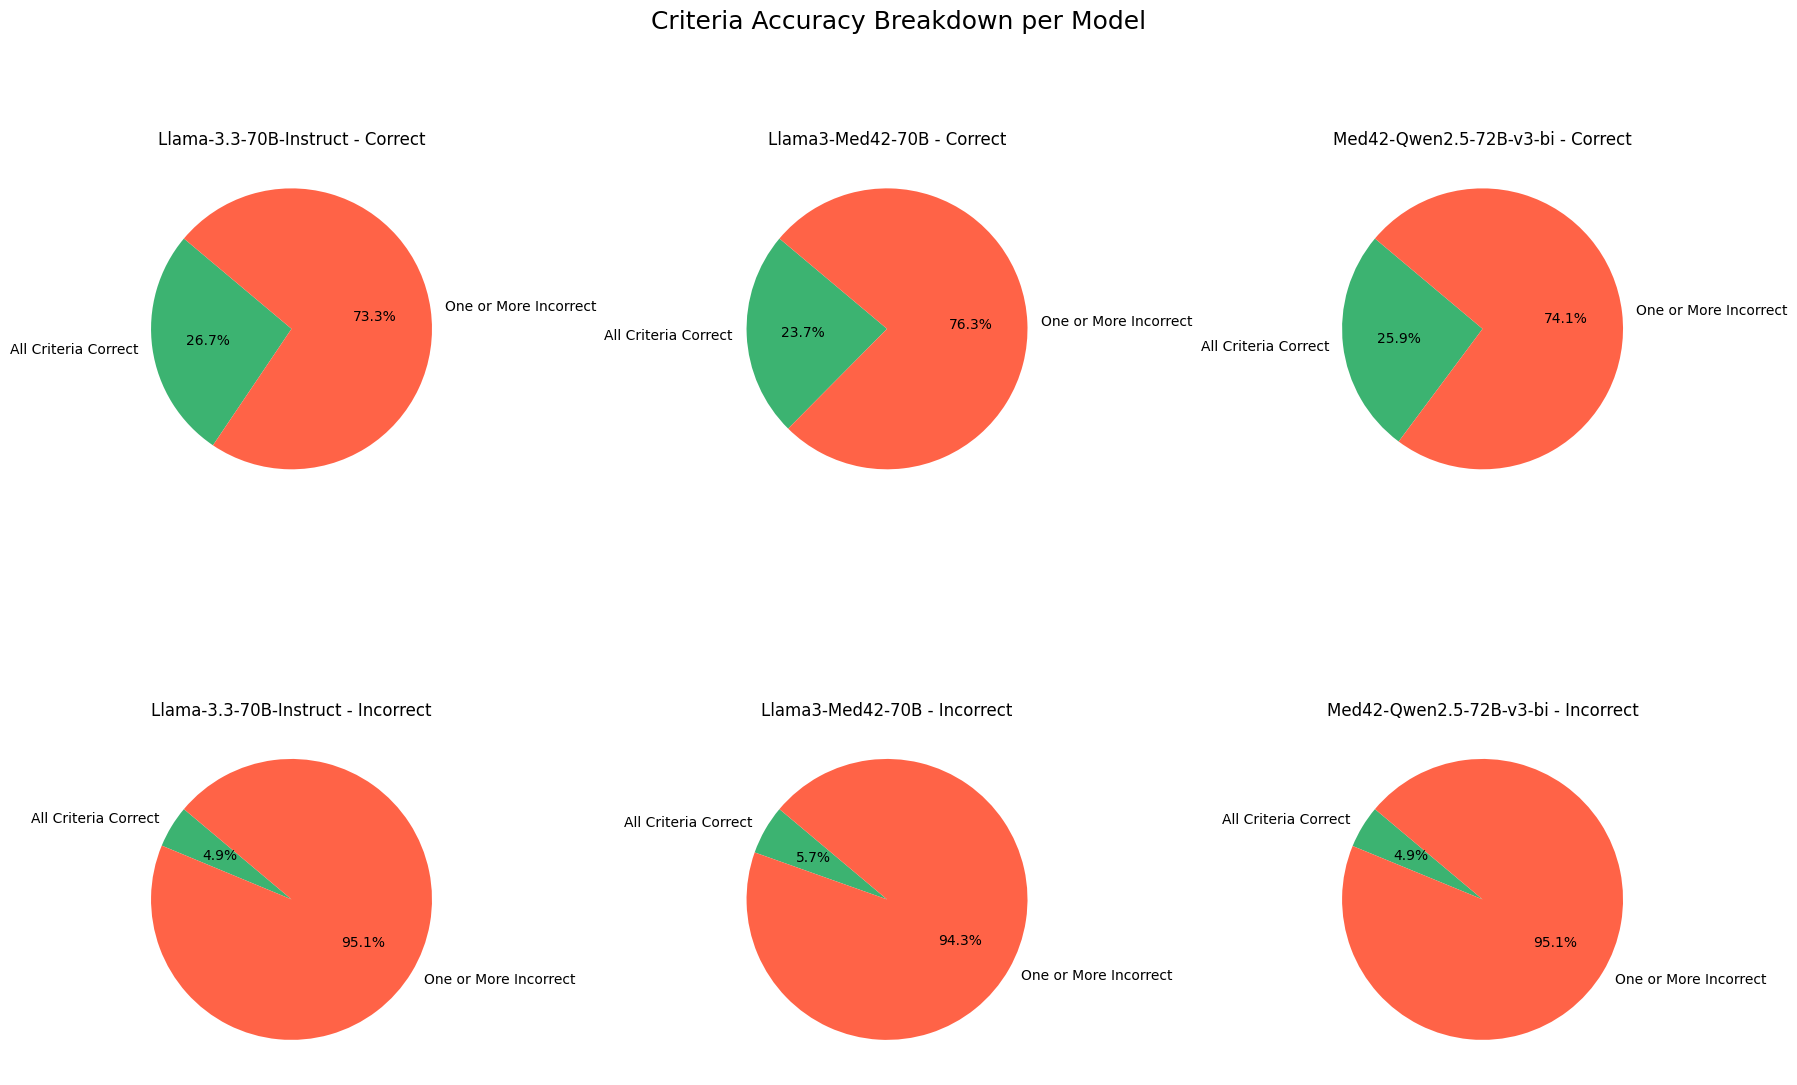

In [ ]:
plot_criteria_accuracy_pie(parsed_json, perc_df)
